## Preprocessing the Input Data

In [2]:
import os
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import datetime
from tqdm import tqdm
from tensorflow.keras.utils import load_img, img_to_array

        
def crop_image(img_path):
    img = Image.open(img_path)
    img = ImageOps.exif_transpose(img)
    img_array = np.array(img)
    width, height = img.size
    x1 = width - 1
    x2 = 0
    y1 = height - 1
    y2 = 0
    for y in range(height):
        for x in range(width):
            pixel_value = img_array[y, x]
            for i in range(4):
                if(pixel_value[i] != 255):
                    x1 = min(x1, x)
                    x2 = max(x2, x)
                    y1 = min(y1, y)
                    y2 = max(y2, y)
                break

    cropped_img = img.crop((x1, y1, x2, y2))
    cropped_img = cropped_img.resize((150, 150))
    return cropped_img

def preprocess_image(img_path):
    img = crop_image(img_path)
    img = img.convert('L')
    img = img_to_array(img)
    img = img / 255.0
    return img

## Testing the Model with some samples

Kalimat_Model_v1 - 57.89% accuracy \
Kalimat_Model_v2 - 68.42% accuracy \
Kalimat_Model_v3 - 42.11% accuracy\
Kalimat_Model_v4 - 63.16% accuracy\
Kalimat_Model_v5 - 63.16% accuracy\
Kalimat_Model_v6 - 57.89% accuracy\
Kalimat_Model_v7 - 42.11% accuracy\
Kalimat_Model_v8 - 78.95% accuracy\
Kalimat_Model_v9 - 73.68% accuracy\
Kalimat_Model_v10 -78.95% accuracy\
Kalimat_Model_v11 - 89.47% accuracy

In [3]:
source_path = 'Datasets\extended_kalimat'
folders = os.listdir(source_path)
print(f"Number of classes: {len(folders)}")
al_kalimat = {i : folder for i, folder in enumerate(folders)}
loaded_model = tf.keras.models.load_model('Models\Kalimat_Model_v12.h5')

mapper = {
    "qita": "قطة",
    "kitab": "كتاب",
    "rasm": "رسم",
    "so3ban": "ثعبان",
    "roman": "رمان",
    "sa3a": "ساعة",
    "zaky": "ذكي",
    "sakr": "صقر",
    "shams": "شمس",
    "kalb": "كلب",
    "mindada": "منضدة",
    "maa": "ماء",
}
# predicting images
test_folder = 'test_data'
score = 0
prediction_paths = []
predictions = []
predictions_confidence = []
wrong_predictions_paths = []
wrong_predictions = []
wrong_predictions_confidence = []
for file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, file)
    img = preprocess_image(img_path)
    img = np.expand_dims(img, axis=0)
    prediction = loaded_model.predict(img)
    prediction_paths.append(img_path)
    predictions.append(al_kalimat[np.argmax(prediction)])
    predictions_confidence.append(round(np.max(prediction)*100, 2))
    if al_kalimat[np.argmax(prediction)].lower() == file.split("_")[0].lower().replace(".png", "").replace(".jpg", "") or al_kalimat[np.argmax(prediction)].lower() == mapper[file.split("_")[0].lower().replace(".png", "").replace(".jpg", "")]:
        score += 1
    else:
        # append the path of the wrong prediction
        wrong_predictions_paths.append(img_path)
        wrong_predictions.append(al_kalimat[np.argmax(prediction)])
        wrong_predictions_confidence.append(round(np.max(prediction)*100, 2))
    # print(f'{al_kalimat[np.argmax(prediction)]} != {file.split("_")[0].lower()}')
    # print(f'File: {file}, Prediction: {al_kalimat[np.argmax(prediction)]}, Confidence: {round(np.max(prediction)*100, 2)}%')
print(f'Predicted {(round(score/len(os.listdir(test_folder))*100, 2))}% correctly')

Number of classes: 53


1/1 [==============================] - 0s 27ms/step
Predicted 80.0% correctly


25


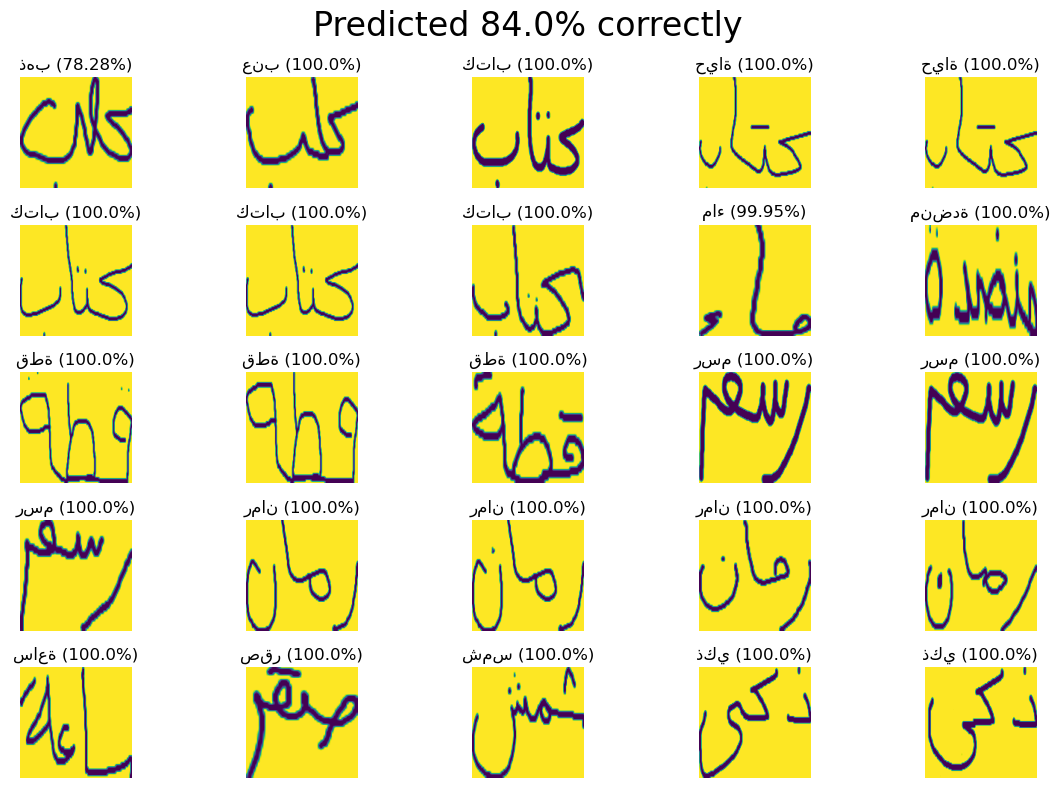

In [7]:
import matplotlib.pyplot as plt
import math

# Desired number of images per row
images_per_row = 5

# Calculate number of rows and columns
total_images = len(predictions)
print(total_images)
rows = math.ceil(total_images / images_per_row)
columns = images_per_row

# Create a figure with subplots
fig, axs = plt.subplots(rows, columns, figsize=(12, 8))
fig.suptitle(f'Predicted {(round(score/len(os.listdir(test_folder))*100, 2))}% correctly', fontsize=24)

# Plot each image on the subplots
for i, path in enumerate(prediction_paths):
    img = plt.imread(path)
    # Preprocess the image
    img = preprocess_image(path)
    row = i // images_per_row
    col = i % images_per_row
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    # Add the title of the image with the predicted class
    axs[row, col].set_title(f'{predictions[i]} ({predictions_confidence[i]}%)', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

4


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

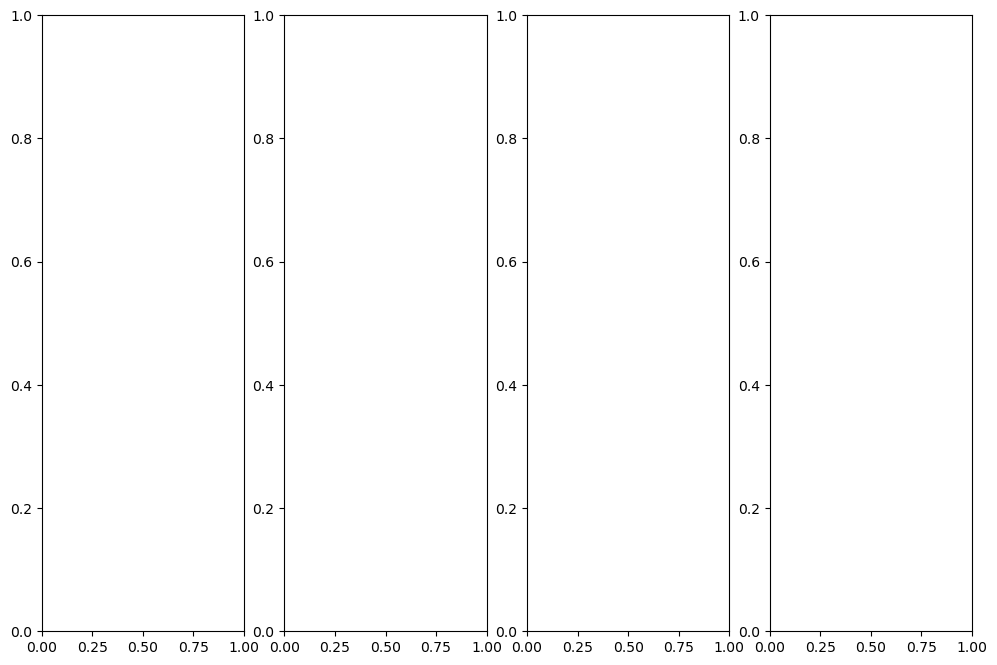

In [8]:
import matplotlib.pyplot as plt
import math

# Desired number of images per row
images_per_row = 4

# Calculate number of rows and columns
total_images = len(wrong_predictions)
print(total_images)
rows = math.ceil(total_images / images_per_row)
columns = images_per_row

# Create a figure with subplots
fig, axs = plt.subplots(rows, columns, figsize=(12, 8))

# Plot each image on the subplots
for i, path in enumerate(wrong_predictions_paths):
    img = plt.imread(path)
    # Preprocess the image
    img = preprocess_image(path)
    row = i // images_per_row
    col = i % images_per_row
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    # Add the title of the image with the predicted class
    axs[row, col].set_title(f'{wrong_predictions[i]} ({wrong_predictions_confidence[i]}%)', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()
